In [5]:
!git clone https://github.com/seanxu889/Track
    

fatal: destination path 'Track' already exists and is not an empty directory.


In [6]:
!ls Track

driving_log.csv  IMG


In [7]:
!pip3 install imgaug

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa # image augmention
import cv2
import pandas as pd
import ntpath
import random


In [6]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-6-d963de388c8a>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/center_2019_04_11_12_22_02_880.jpg   
1  /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/center_2019_04_11_12_22_02_981.jpg   
2  /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/center_2019_04_11_12_22_03_093.jpg   
3  /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/center_2019_04_11_12_22_03_209.jpg   
4  /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/center_2019_04_11_12_22_03_313.jpg   

                                                                                                                                                       left  \
0   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/left_2019_04_11_12_22_02_880.jpg   
1   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/left_2019_04_11_12_22_02_981.jpg   
2   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/left_2019_04_11_12_22_03_093.jpg   
3   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/left_2019_04_11_12_22_03_209.jpg   
4   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/left_2019_04_11_12_22_03_313.jpg   

                                                                                                                                                       right  \
0   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/right_2019_04_11_12_22_02_880.jpg   
1   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/right_2019_04_11_12_22_02_981.jpg   
2   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/right_2019_04_11_12_22_03_093.jpg   
3   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/right_2019_04_11_12_22_03_209.jpg   
4   /Users/seanxu/Desktop/Learn/Python/Spyder_py3/Udemy/Self_Driving_Cars/9_Self-Driving_Cars_Behavioural_Cloning/data/IMG/right_2019_04_11_12_22_03_313.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000080  
1  0.0       0.0       0        0.000079  
2  0.0       0.0       0        0.000079  
3  0.0       0.0       0        0.000078  
4  0.0       0.0       0        0.000078

In [7]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2019_04_11_12_22_02_880.jpg  left_2019_04_11_12_22_02_880.jpg   
1  center_2019_04_11_12_22_02_981.jpg  left_2019_04_11_12_22_02_981.jpg   
2  center_2019_04_11_12_22_03_093.jpg  left_2019_04_11_12_22_03_093.jpg   
3  center_2019_04_11_12_22_03_209.jpg  left_2019_04_11_12_22_03_209.jpg   
4  center_2019_04_11_12_22_03_313.jpg  left_2019_04_11_12_22_03_313.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_04_11_12_22_02_880.jpg  0.0       0.0       0        0.000080  
1  right_2019_04_11_12_22_02_981.jpg  0.0       0.0       0        0.000079  
2  right_2019_04_11_12_22_03_093.jpg  0.0       0.0       0        0.000079  
3  right_2019_04_11_12_22_03_209.jpg  0.0       0.0       0        0.000078  
4  right_2019_04_11_12_22_03_313.jpg  0.0       0.0       0        0.000078

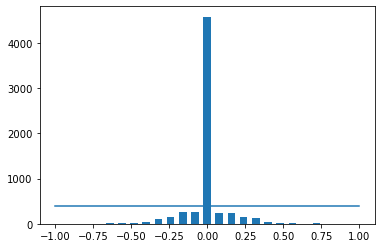

In [8]:
# visualize the distribution
num_bins = 25 # odd number
samples_per_bin = 400 # every bin can only have a max of 200 samples to visualize this threshold
# under the 200 line, every data would be a uniform distribution of our data samples
# and reject all samples that exceed 200(remove thses samples), then the data won't be heavily skewed towards prediction zero.
# and also keep some number of zero steering angles, which would correspond to centered lane driving.
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5 # -1 to 1, center of 0
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
# flatten our data distribution and cut off extraneous samples for specific bins whose frequence exceed 200.

total data: 6311
removed: 4177
remaining: 2134


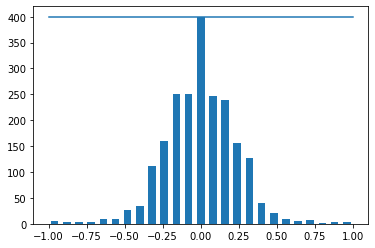

In [9]:
# balance the data
print('total data:', len(data))
remove_list = [] # specific the samples we want to remove
for j in range(num_bins): # loop through every single bin
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_) # shuffle the ordred data, and cut off the last 300 elements from all parts of the track
  list_ = list_[samples_per_bin:] # 200 to the end
  remove_list.extend(list_)
  
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True) # drop specific rows of data in our data frame which correspond to these indices inside of removelist
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
# output a distribution of steering angles that are much more uniform, our data distribution currently seems to be well balanced.

In [10]:
# Training & Validation Split
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i] # .iloc will allow us to perform a selection on a row of data from our data frame based on the specified index
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip())) # Track/IMG/center_2019...
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_04_11_12_22_04_793.jpg
left        left_2019_04_11_12_22_04_793.jpg  
right       right_2019_04_11_12_22_04_793.jpg 
steering   -0.276633                          
throttle    1                                 
reverse     0                                 
speed       4.5132                            
Name: 18, dtype: object


Training Samples: 5121
Valid Samples: 1281


Text(0.5, 1.0, 'Validation set')

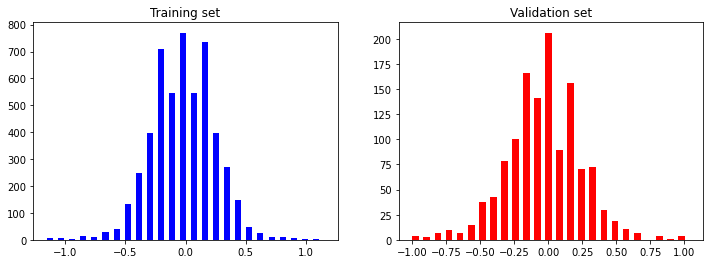

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [12]:
# image augmention - zoom
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

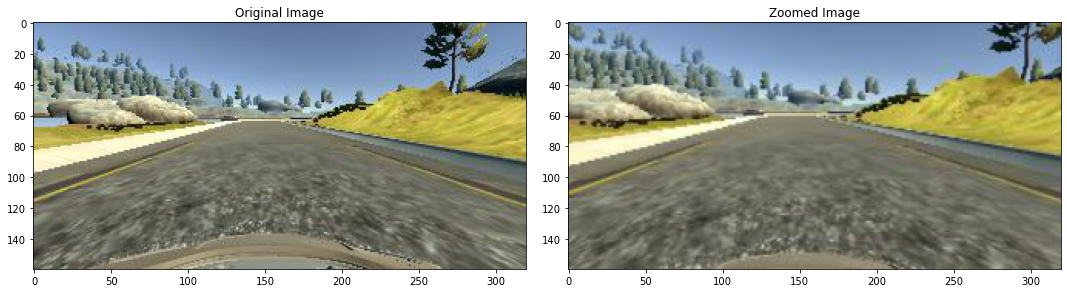

In [13]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [14]:
# image augmention - pan
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

Text(0.5, 1.0, 'Panned Image')

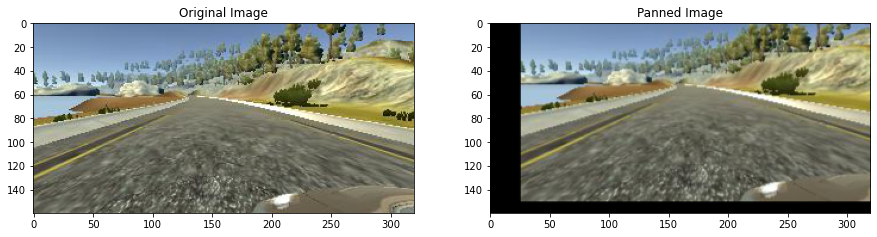

In [15]:
ig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

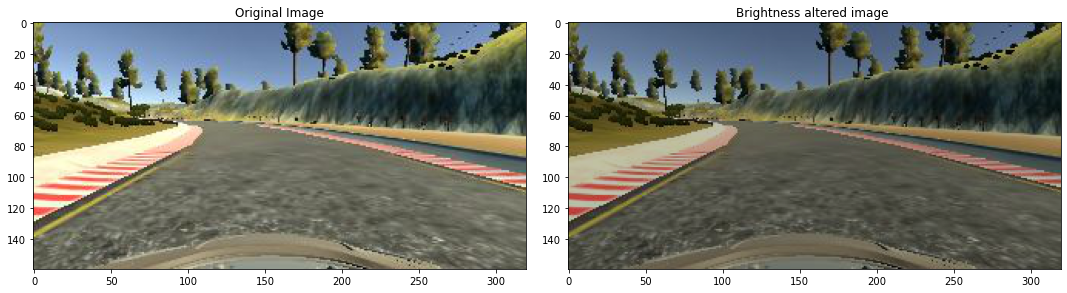

In [16]:
# image augmention - brightness
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
  
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [17]:
#image augmention - flip
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.07449903')

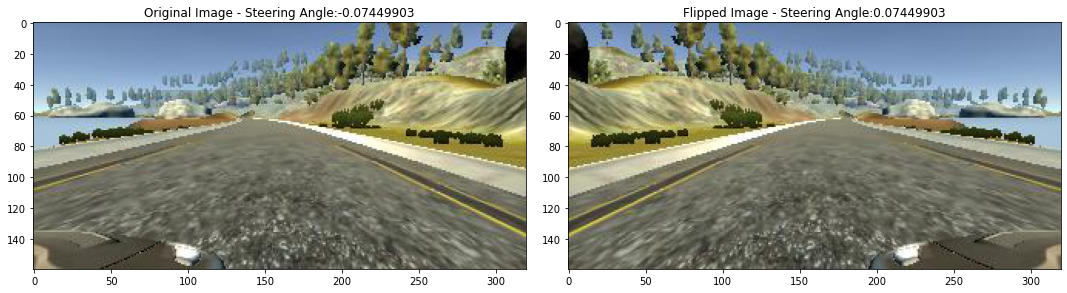

In [18]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [19]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

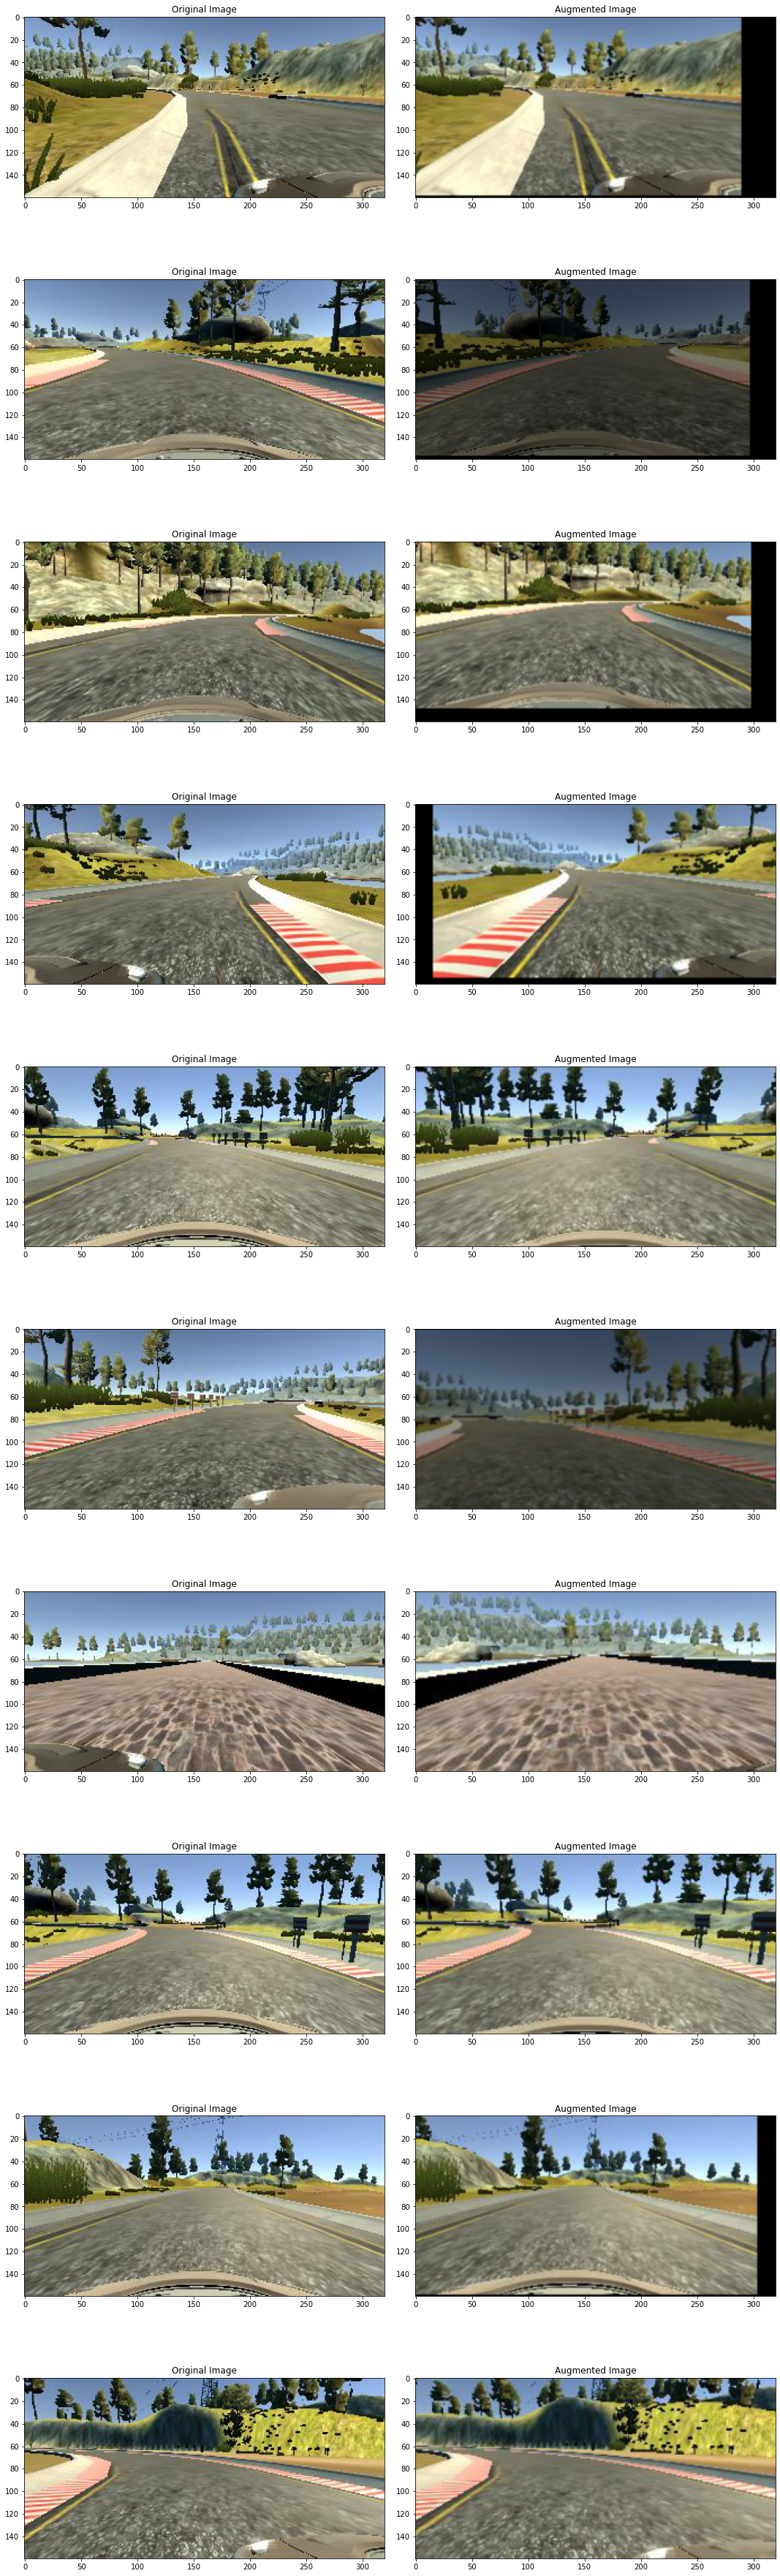

In [21]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [23]:
# preprocessing images
def img_preprocess(img):
    #img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # NVIDIA model architects recommend using YUV color space
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255 # normalization
    return img

Text(0.5, 1.0, 'Preprocessed Image')

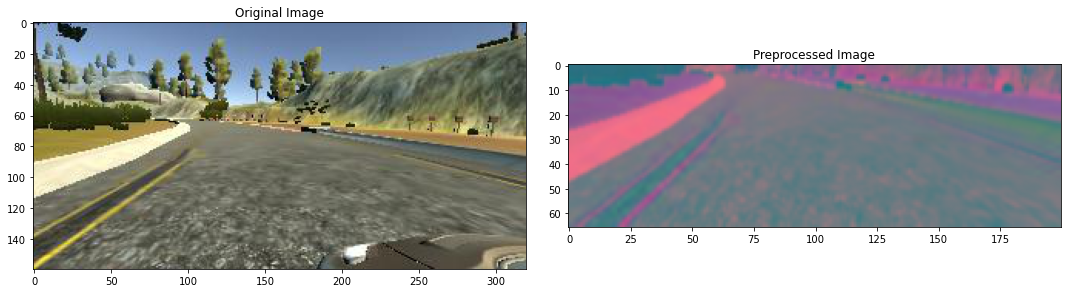

In [24]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [25]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  # python generators: use the yield keyword instead of the return keyword
  # it also saves all the initialized values inside the batch generator
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

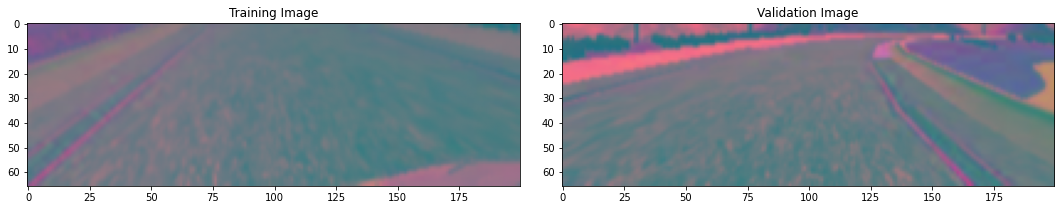

In [26]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [27]:
# Defining Nvidia Model
def nvidia_model():
    model= Sequential()
     # filters=None
      #kernal_size=None

    #model.add(Convolution2D(nb_filter=24, nb_col=5, nb_row=5,subsample=(2, 2), input_shape=(66, 200, 3), activation='relu')) # replace relu to elu function
    #model.add(Convolution2D(nb_filter=36, nb_col=5, nb_row=5,subsample=(2, 2), activation='relu'))
    #model.add(Convolution2D(nb_filter=48, nb_col=5, nb_row= 5,subsample=(2, 2), activation='relu'))
    #model.add(Convolution2D(nb_filter=64, nb_col=3, nb_row=3, activation='relu'))
    #model.add(Convolution2D(nb_filter=64, nb_col=3, nb_row=3, activation='relu'))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Dropout(0.5))
  
    model.add(Flatten())
  
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(1)) # output the predicted steering angle 
  
    optimizer = Adam(lr=1e-4)
    model.compile(loss='mse', optimizer=optimizer)
    return model

model = nvidia_model()
print(model.summary())
# dead relu problem: when a node in the network essentially dies and only feeds value of 0 to the following nodes.  
# Since the gradient at this point is 0 then the weight of this node will never be changed as back propagation uses the gradient value to change the weigh;
# this means that the node always receive a negative input and will always feed forward the 0 value without ever learning.
# If enough relus die then the loss of the models will remain stagnant and never decrease.

TypeError: ('Keyword argument not understood:', 'subsample')

In [10]:
istory = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')
model.save('model.h5')
from google.colab import files
files.download('model.h5')

NameError: name 'model' is not defined